<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [2]:
dados = pd.read_csv('dados/HousePrices_HalfMil.csv', sep = ';')

## Visualizar os dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   precos     1000 non-null   int64
 1   area       1000 non-null   int64
 2   garagem    1000 non-null   int64
 3   banheiros  1000 non-null   int64
 4   lareira    1000 non-null   int64
 5   marmore    1000 non-null   int64
 6   andares    1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


## Verificando o tamanho do dataset

In [4]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [6]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


1) As mais correlatas a variável dependente PREÇO são: Andares e Mármore

2) São todas correlações positivas, se aumenta a variável em questão, aumenta-se o PREÇO

3) Não a correlação é baixa entre a maioria 

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='Box-Plot.png'>

## Configure o estilo e cor dos gráficos (opcional)

## Box plot da variável *dependente* 


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>


### 1) Não existem outliers, observações fora do box esperado
### 2) Não apresenta tendência 

<AxesSubplot:title={'center':'Boxplot dos preços de imóvel'}, ylabel='Preço do imóvel'>

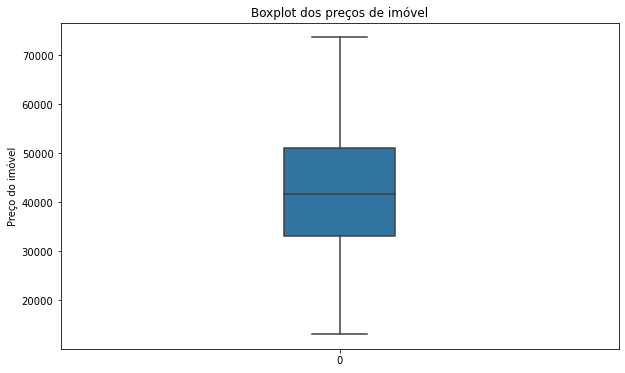

In [7]:
boxplot = sns.boxplot(data = dados.precos,orient = 'v', width = 0.2)
boxplot.figure.set_size_inches(10,6)
boxplot.set_ylabel('Preço do imóvel')
boxplot.set_title('Boxplot dos preços de imóvel')
boxplot

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<AxesSubplot:title={'center':'Preço X Garagem'}, xlabel='Garagensm', ylabel='Preço'>

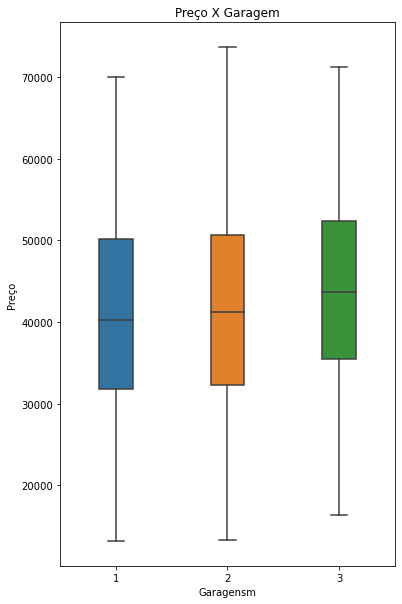

In [8]:
bx1 =sns.boxplot(y = dados.precos, x = dados.garagem, data = dados, width = 0.3)
bx1.figure.set_size_inches(6,10)
bx1.set_title('Preço X Garagem')
bx1.set_ylabel('Preço')
bx1.set_xlabel('Garagensm')
bx1

### Box-plot (Preço X Banheiros)

<AxesSubplot:title={'center':'Preço X Banheiros'}, xlabel='Banheiros', ylabel='Preço'>

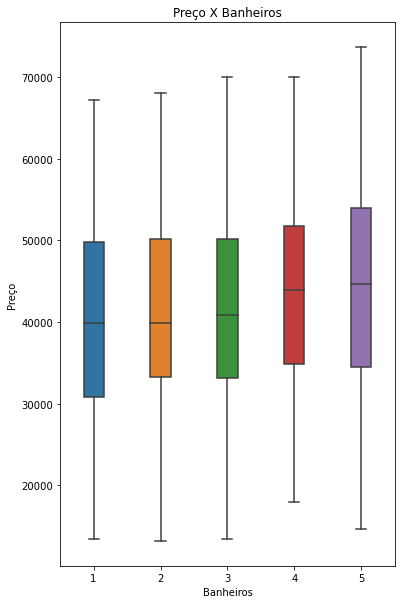

In [9]:
bx2 =sns.boxplot(y = dados.precos, x = dados.banheiros, data = dados, width = 0.3)
bx2.figure.set_size_inches(6,10)
bx2.set_title('Preço X Banheiros')
bx2.set_ylabel('Preço')
bx2.set_xlabel('Banheiros')
bx2

### Box-plot (Preço X Lareira)

<AxesSubplot:title={'center':'Preço X Lareira'}, xlabel='Espaço com Lareira', ylabel='Preço'>

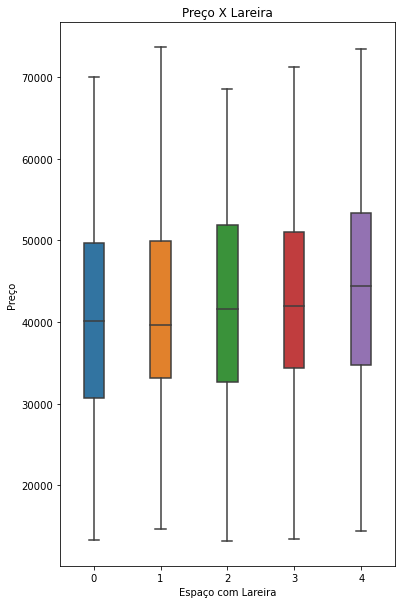

In [10]:
bx3 =sns.boxplot(y = dados.precos, x = dados.lareira, data = dados, width = 0.3)
bx3.figure.set_size_inches(6,10)
bx3.set_title('Preço X Lareira')
bx3.set_ylabel('Preço')
bx3.set_xlabel('Espaço com Lareira')
bx3

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot:title={'center':'Preço X Mármore'}, xlabel='Espaço com Mármore', ylabel='Preço'>

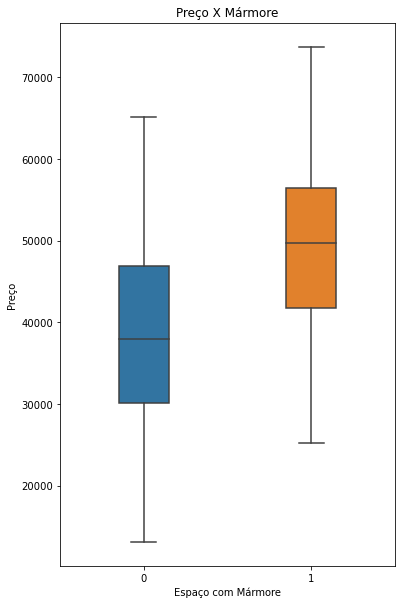

In [11]:
bx4 =sns.boxplot(y = dados.precos, x = dados.marmore, data = dados, width = 0.3)
bx4.figure.set_size_inches(6,10)
bx4.set_title('Preço X Mármore')
bx4.set_ylabel('Preço')
bx4.set_xlabel('Espaço com Mármore')
bx4

### Box-plot (Preço X Andares)

<AxesSubplot:title={'center':'Preço X Andares'}, xlabel='Mais de um andar', ylabel='Preço'>

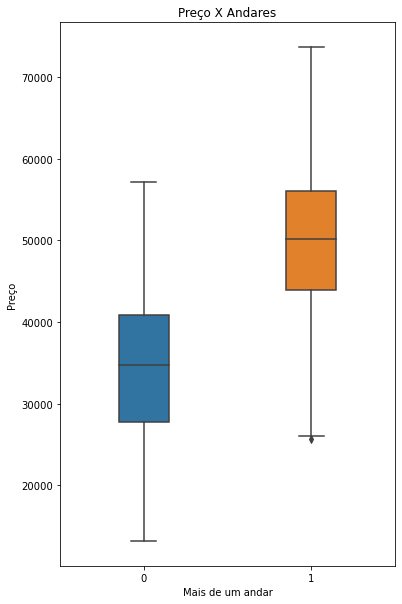

In [12]:
bx5 =sns.boxplot(y = dados.precos, x = dados.andares, data = dados, width = 0.3)
bx5.figure.set_size_inches(6,10)
bx5.set_title('Preço X Andares')
bx5.set_ylabel('Preço')
bx5.set_xlabel('Mais de um andar')
bx5

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Preço X Garagem
#### 1) Não há nenhuma mudança muito grande de preço para o incremento de garagens
#### 2) Há um leve incremento de preço com o aumento de garagens

### Preço X Banheiros
#### 1) Não há nenhuma mudança muito grande de preço para o incremento de banheiros
#### 2) Há um leve incremento de preço com o aumento de banheiros

### Preço X Lareira
#### 1) Não há nenhuma mudança muito grande de preço para o incremento de lareiras
#### 2) Há um leve incremento de preço com o aumento de lareiras

### Preço X Mármore
#### 1) Há um grande aumento de preço dos imóveis com espaço de mármore
#### 2) Há um um grande incremento de preço dos imóveis com espaço de mármore

### Preço X Andares
#### 1) Há um grande aumento de preço dos imóveis com mais de um andar
#### 2) Há um um grande incremento de preço dos imóveis com mais de um andar

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

<AxesSubplot:xlabel='precos', ylabel='Count'>

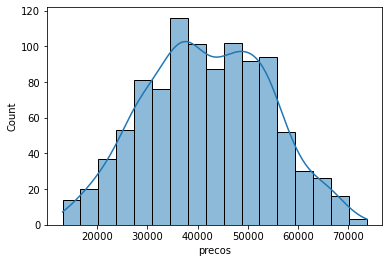

In [13]:
h1 = sns.histplot(data = dados.precos, kde = True)
h1

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

### Respostas 

#### 1) Não é possível verificar relações lineares
#### 2) As relações são todas positivas
#### 3) A matriz de correlação já mostrava pouca correlação entre variáveis

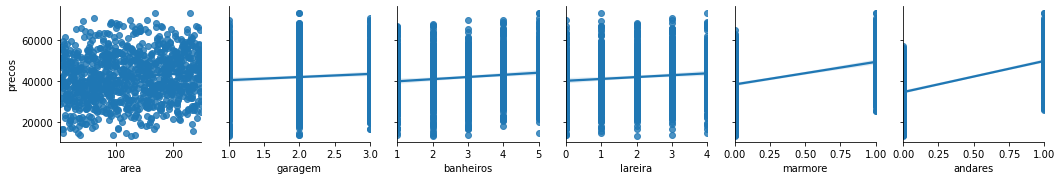

In [14]:
pp = sns.pairplot(dados,y_vars ='precos',x_vars=['area','garagem','banheiros','lareira','marmore','andares'], kind = 'reg')
pp

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [15]:
y = dados['precos']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [16]:
X = dados[['area','garagem', 'banheiros', 'lareira', 'marmore', 'andares']]
X 

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1
...,...,...,...,...,...,...
995,48,1,5,4,0,0
996,112,2,2,3,0,1
997,185,3,4,4,0,1
998,185,2,3,1,0,1


## Criando os datasets de treino e de teste

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2811)

## Instanciando a classe *LinearRegression()*

In [18]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [19]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

### Respostas:

#### 1) O modelo apresenta um ajuste razoável

#### 2) O R² é a aderência das observações a reta de regressão 

#### 3)

In [20]:
score1 = modelo.score(X_train,y_train)
print('Valor de R²: ' + '%0.2f' % score1)

Valor de R²: 0.64


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [21]:
y_prev1 = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [22]:
score_pre = metrics.r2_score(y_test,y_prev1)
print('Valor de R²: ' + '%0.2f' % score_pre)

Valor de R²: 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [27]:
entrada = X_test[0:1]
entrada

,area,garagem,banheiros,lareira,marmore,andares
402,38,2,4,4,0,1


In [29]:
modelo.predict(entrada).round(2)[0]

46389.8

In [28]:
a1 = 38
g1 = 2
b1 = 4
l1 = 4
m1 = 0
ad1 = 1
entrada1 = [[a1, g1, b1, l1, m1, ad1]]
print('{} Preço'.format(modelo.predict(entrada1).round(2)))

[46389.8] Preço


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [26]:
EQM = metrics.mean_squared_error(y_test,y_prev1).round(2)
Raiz_EQM = np.sqrt(EQM).round(2)
R2 = metrics.r2_score(y_test, y_prev1).round(2)

pd.DataFrame([EQM, Raiz_EQM, R2], ['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'R²'], columns = ['Métricas'])

,Métricas
Erro Quadrático Médio,50197019.50
Raiz do Erro Quadrático Médio,7084.99
R²,0.67


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [30]:
import pickle

## Salvando o modelo estimado

In [31]:
output = open('modelo_preço', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```